In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('E:/Machine learning/Pet projects/churn prediction/Churn_Modelling.csv')

In [2]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Female' else 1)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: xlabel='Exited', ylabel='count'>

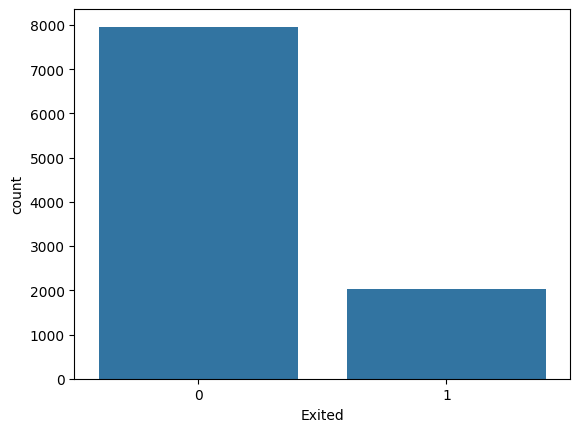

In [6]:
sns.countplot(x="Exited", data=df)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2416
           1       0.76      0.42      0.55       584

    accuracy                           0.86      3000
   macro avg       0.82      0.70      0.73      3000
weighted avg       0.85      0.86      0.85      3000



<Axes: >

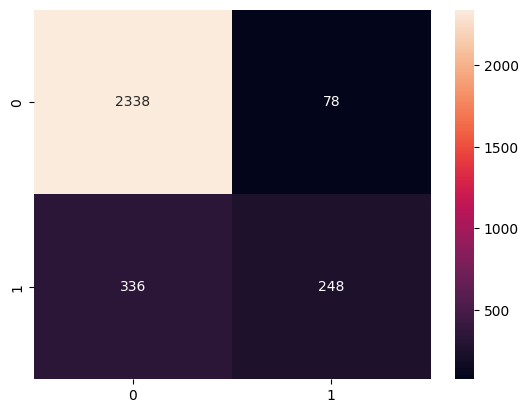

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop(columns=['Exited', 'Geography', 'Surname'])
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [8]:
correlation_matrix = X.corr()

high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:
            feature = correlation_matrix.columns[i]
            high_corr_features.add(feature)

high_corr_features

set()

In [9]:
from catboost import CatBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

y_pred = cat_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.75      0.45      0.57       584

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.74      3000
weighted avg       0.86      0.86      0.85      3000



         Feature Id  Importances
0               Age    19.052884
1     NumOfProducts    18.562095
2           Balance    11.666198
3   EstimatedSalary     9.362009
4         RowNumber     9.197037
5        CustomerId     8.326670
6       CreditScore     8.143872
7    IsActiveMember     6.286313
8            Tenure     5.071655
9            Gender     3.026702
10        HasCrCard     1.304564


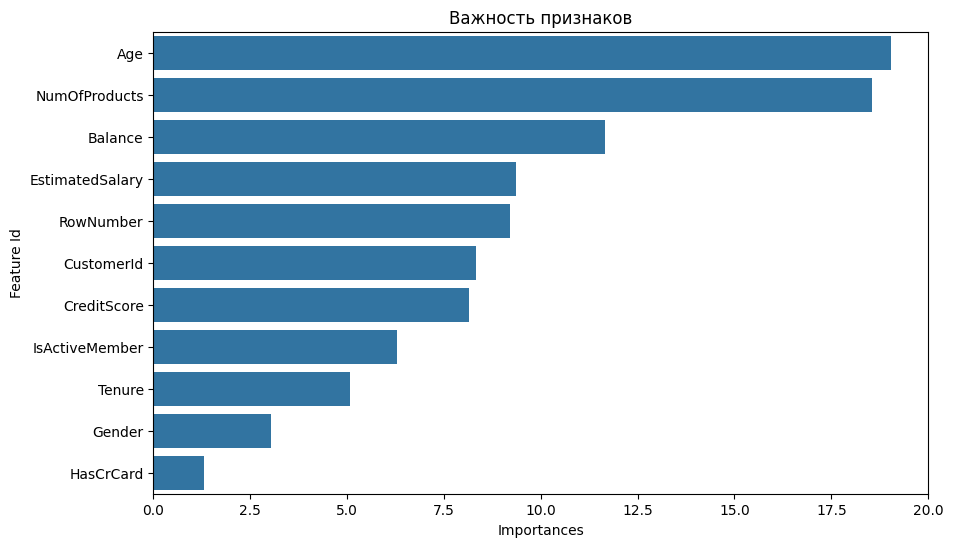

In [12]:
feature_importances = cat_model.get_feature_importance(prettified=True)
print(feature_importances)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importances'], y=feature_importances['Feature Id'])
plt.title("Важность признаков")
plt.show()

In [15]:
from sklearn.preprocessing import PolynomialFeatures

top_10_features = feature_importances.head(10)["Feature Id"]
X_top10 = X[top_10_features]

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_top10)

X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X_top10.columns))

print(f"Количество признаков после полиномиального преобразования: {X_poly.shape[1]}")

Количество признаков после полиномиального преобразования: 55


In [16]:
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)
cat_model_poly = CatBoostClassifier(verbose=0, random_state=42)
cat_model_poly.fit(X_train_poly, y_train)

poly_feature_importances = cat_model_poly.get_feature_importance(prettified=True)

significant_poly_features = poly_feature_importances[poly_feature_importances['Importances'] > 1]
significant_feature_names = significant_poly_features['Feature Id']

X_poly_filtered = X_poly[significant_feature_names]
print(f"Оставлено {X_poly_filtered.shape[1]} значимых признаков после фильтрации.")

Оставлено 42 значимых признаков после фильтрации.


In [17]:
X_train_final, X_test_final, y_train, y_test = train_test_split(X_poly_filtered, y, test_size=0.3, random_state=42)
final_model = CatBoostClassifier(verbose=0, random_state=42)
final_model.fit(X_train_final, y_train)

y_pred_final = final_model.predict(X_test_final)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.74      0.46      0.57       584

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000



In [22]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 500]
}

grid_search = GridSearchCV(estimator=CatBoostClassifier(verbose=50, random_state=42),
                           param_grid=param_grid,
                           scoring='recall',
                           cv=3)

grid_search.fit(X_train_final, y_train)
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test_final)
print(classification_report(y_test, y_pred_best))


0:	learn: 0.6860385	total: 4.54ms	remaining: 450ms
50:	learn: 0.4771969	total: 162ms	remaining: 156ms
99:	learn: 0.4076935	total: 317ms	remaining: 0us
0:	learn: 0.6862919	total: 3.19ms	remaining: 316ms
50:	learn: 0.4852486	total: 151ms	remaining: 145ms
99:	learn: 0.4183199	total: 318ms	remaining: 0us
0:	learn: 0.6855293	total: 3.92ms	remaining: 388ms
50:	learn: 0.4799200	total: 157ms	remaining: 151ms
99:	learn: 0.4096468	total: 310ms	remaining: 0us
0:	learn: 0.6586843	total: 3.02ms	remaining: 299ms
50:	learn: 0.3536001	total: 157ms	remaining: 150ms
99:	learn: 0.3342535	total: 309ms	remaining: 0us
0:	learn: 0.6599363	total: 3.13ms	remaining: 310ms
50:	learn: 0.3644255	total: 153ms	remaining: 147ms
99:	learn: 0.3443862	total: 307ms	remaining: 0us
0:	learn: 0.6562493	total: 3.79ms	remaining: 375ms
50:	learn: 0.3541013	total: 152ms	remaining: 146ms
99:	learn: 0.3355521	total: 303ms	remaining: 0us
0:	learn: 0.6268863	total: 3ms	remaining: 297ms
50:	learn: 0.3342815	total: 151ms	remaining: 1

ROC AUC: 0.759


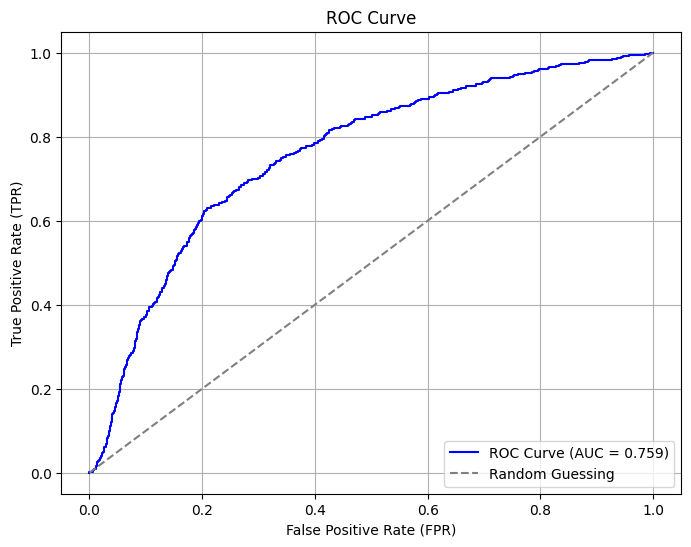

In [36]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('catboost', CatBoostClassifier(verbose=0, random_state=42))
]

meta_model = LogisticRegression(max_iter=300)

stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,  
    passthrough=True  
)

stacking_model.fit(X_train, y_train)

y_proba = stacking_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


ROC AUC: 0.870


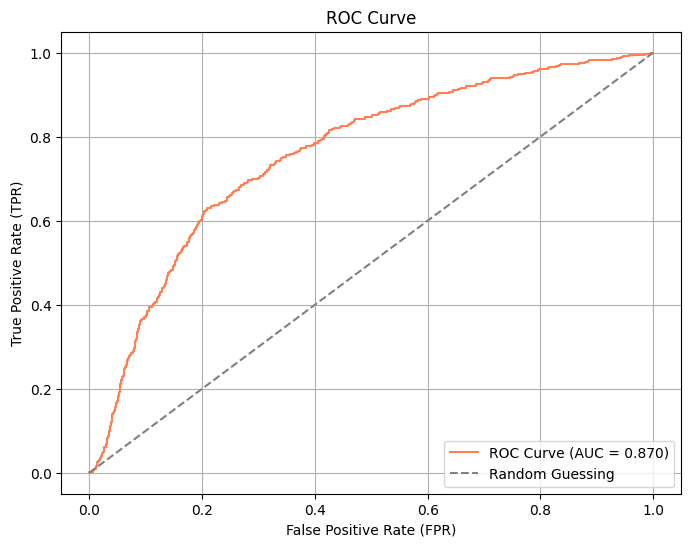

In [39]:
models = []
random_seeds = [42, 123, 456]

for seed in random_seeds:
    model = CatBoostClassifier(
        iterations=100,
        depth=6,
        learning_rate=0.1,
        random_seed=seed,
        verbose=0
    )
    model.fit(X_train, y_train)
    models.append(model)

predictions = np.zeros((len(X_test), len(models)))
for i, model in enumerate(models):
    predictions[:, i] = model.predict_proba(X_test)[:, 1]

final_predictions = np.mean(predictions, axis=1)

roc_auc = roc_auc_score(y_test, final_predictions)
print(f"ROC AUC: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})', color='coral')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [41]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score
import numpy as np

param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.1, 0.01, 0.05],
}

grid = list(ParameterGrid(param_grid))

best_params = None
best_auc = 0.0

for params in grid:
    model = CatBoostClassifier(
        iterations=params['iterations'],
        depth=params['depth'],
        learning_rate=params['learning_rate'],
        random_seed=42,
        verbose=0
    )
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    
    print(f"Params: {params}, ROC AUC: {auc:.3f}")
    
    if auc > best_auc:
        best_auc = auc
        best_params = params

print("\nBest Parameters:")
print(best_params)
print(f"Best ROC AUC: {best_auc:.3f}")


Params: {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}, ROC AUC: 0.872
Params: {'depth': 4, 'iterations': 100, 'learning_rate': 0.01}, ROC AUC: 0.860
Params: {'depth': 4, 'iterations': 100, 'learning_rate': 0.05}, ROC AUC: 0.870
Params: {'depth': 4, 'iterations': 200, 'learning_rate': 0.1}, ROC AUC: 0.865
Params: {'depth': 4, 'iterations': 200, 'learning_rate': 0.01}, ROC AUC: 0.868
Params: {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}, ROC AUC: 0.873
Params: {'depth': 4, 'iterations': 300, 'learning_rate': 0.1}, ROC AUC: 0.862
Params: {'depth': 4, 'iterations': 300, 'learning_rate': 0.01}, ROC AUC: 0.871
Params: {'depth': 4, 'iterations': 300, 'learning_rate': 0.05}, ROC AUC: 0.872
Params: {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}, ROC AUC: 0.870
Params: {'depth': 6, 'iterations': 100, 'learning_rate': 0.01}, ROC AUC: 0.862
Params: {'depth': 6, 'iterations': 100, 'learning_rate': 0.05}, ROC AUC: 0.870
Params: {'depth': 6, 'iterations': 200, 'learning_rate':

ROC AUC: 0.873


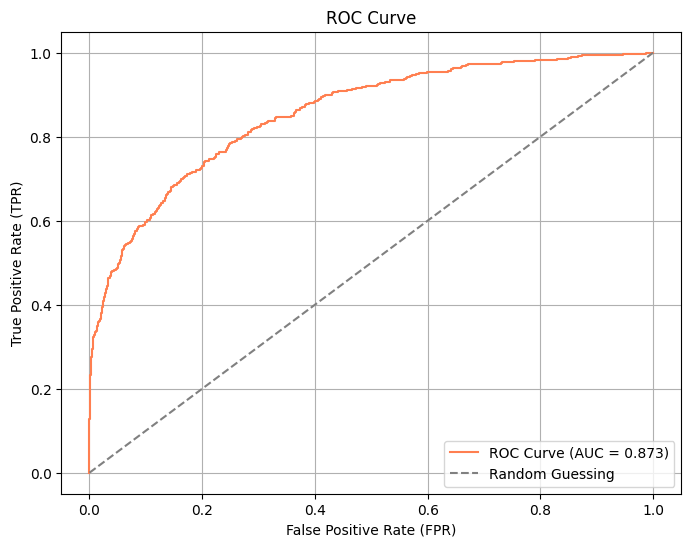

In [48]:
models = []
random_seeds = [42, 123, 456]

for seed in random_seeds:
    model = CatBoostClassifier(
        iterations=200,
        depth=4,
        learning_rate=0.05,
        random_seed=seed,
        verbose=0
    )
    model.fit(X_train, y_train)
    models.append(model)

predictions = np.zeros((len(X_test), len(models)))
for i, model in enumerate(models):
    predictions[:, i] = model.predict_proba(X_test)[:, 1]

final_predictions = np.mean(predictions, axis=1)

roc_auc = roc_auc_score(y_test, final_predictions)
print(f"ROC AUC: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})', color='coral')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()